In [22]:
from   sklearn.tree        import DecisionTreeRegressor
from   sklearn.model_selection import GridSearchCV
from   sklearn.model_selection import cross_val_score
from   sklearn                 import metrics
from   sklearn                 import tree
import pandas                  as     pd
import numpy                   as     np
import seaborn                 as     sns
import matplotlib.pyplot       as     plt
import warnings
warnings.filterwarnings("ignore")

In [23]:
olympics_all = pd.read_csv(r'C:\Users\USER\Desktop\DS_python\CP4\CP4\OlympicsData\olympics_all.csv')

In [24]:
X=olympics_all.drop(['NOC', 'country','Gold','Silver','Bronze', 'Medals','GDP_Per_Capita'],axis=1)
y=olympics_all[['Year','Gold','Silver','Bronze', 'Medals']]
print(X.shape)
print(y.shape)

(544, 10)
(544, 5)


In [25]:
#Splitting data 

X_trn = X[X['Year']<2016]
X_tst = X[X['Year'] == 2016]

y_trn = y[y['Year'] < 2016]
y_tst =  y[y['Year'] == 2016]

X_train = X_trn.drop(['Year'],axis=1)
X_test  = X_tst.drop(['Year'],axis=1)
print(X_train.shape)
print(X_test.shape)

y_train = y_trn
y_test =  y_tst
print(y_train.shape)
print(y_test.shape)

(460, 9)
(84, 9)
(460, 5)
(84, 5)


In [26]:
# Create linear regression objects
rf_gold   = DecisionTreeRegressor(random_state=0)
rf_silver = DecisionTreeRegressor(random_state=0)
rf_bronze = DecisionTreeRegressor(random_state=0)

# Train the models using the training sets
rf_gold.  fit(  X_train, y_train['Gold'])
rf_silver.fit(X_train, y_train['Silver'])
rf_bronze.fit(X_train, y_train['Bronze'])

DecisionTreeRegressor(random_state=0)

In [27]:
#Testing the model

y_pred_Gold   = rf_gold.predict(X_test)
y_pred_Gold   = y_pred_Gold.astype('int64')
y_pred_Gold   = y_pred_Gold.clip(min=0)

y_pred_Silver   = rf_silver.predict(X_test)
y_pred_Silver   = y_pred_Silver.astype('int64')
y_pred_Silver   = y_pred_Silver.clip(min=0)


y_pred_Bronze   = rf_bronze.predict(X_test)
y_pred_Bronze   = y_pred_Bronze.astype('int64')
y_pred_Bronze   = y_pred_Bronze.clip(min=0)

In [28]:
#Applying k-fold cross_validation

accuracy_gold = cross_val_score(estimator=rf_gold,X=X_train,y=y_train['Gold'],cv=4)
accuracy_silver = cross_val_score(estimator=rf_silver,X=X_train,y=y_train['Silver'],cv=4)
accuracy_bronze = cross_val_score(estimator=rf_bronze,X=X_train,y=y_train['Bronze'],cv=4)

print("Gold Accuracy:", accuracy_gold)
print("Silver Accuracy:",accuracy_silver)
print("Bronze Accuracy:",accuracy_bronze)

print()
print("Gold Accuracy  :", (accuracy_gold.mean()*100).round(3), ' and Std Dev:',accuracy_gold.std().round(2))
print("Silver Accuracy:", (accuracy_silver.mean()*100).round(3), ' and Std Dev:',accuracy_silver.std().round(2))
print("Bronze Accuracy:", (accuracy_bronze.mean()*100).round(3), ' and Std Dev:',accuracy_bronze.std().round(2))
print()

Gold Accuracy: [0.76607098 0.78017636 0.79889299 0.87585523]
Silver Accuracy: [0.82480688 0.82727632 0.80605649 0.85457786]
Bronze Accuracy: [0.86074327 0.76028826 0.85536489 0.90178253]

Gold Accuracy  : 80.525  and Std Dev: 0.04
Silver Accuracy: 82.818  and Std Dev: 0.02
Bronze Accuracy: 84.454  and Std Dev: 0.05



In [29]:
param={'criterion' : ['mse', 'friedman_mse', 'mae', 'poisson'],
'splitter' : ['best', 'random'],
'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [23,4,5,6,7,8,9]}

grid = GridSearchCV(estimator=rf_gold,param_grid=param,cv=3)
grid.fit(X_train,y_train['Gold'])
best_accuracy  = grid.best_score_
best_parameter = grid.best_params_
print("Best Accuracy(Gold):",best_accuracy)
print("Best Parameters(Gold):",best_parameter)
print("Best Estimator(Gold):", grid.best_estimator_)


grid = GridSearchCV(estimator=rf_silver,param_grid=param,cv=3)
grid.fit(X_train,y_train['Silver'])
best_accuracy  = grid.best_score_
best_parameter = grid.best_params_
print("Best Accuracy(Silver):",best_accuracy)
print("Best Parameters(Silver):",best_parameter)
print("Best Estimator(Silver):", grid.best_estimator_)

grid = GridSearchCV(estimator=rf_bronze,param_grid=param,cv=3)
grid.fit(X_train,y_train['Bronze'])
best_accuracy  = grid.best_score_
best_parameter = grid.best_params_
print("Best Accuracy(Bronze):",best_accuracy)
print("Best Parameters(Bronze):",best_parameter)
print("Best Estimator(Bronze):", grid.best_estimator_)

Best Accuracy(Gold): 0.8638224468736014
Best Parameters(Gold): {'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}
Best Estimator(Gold): DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=0)
Best Accuracy(Silver): 0.858140575906183
Best Parameters(Silver): {'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}
Best Estimator(Silver): DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=0)
Best Accuracy(Bronze): 0.8948054366561143
Best Parameters(Bronze): {'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto', 'splitter': 'best'}
Best Estimator(Bronze): DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0)


In [30]:
data = pd.read_csv(r'C:\Users\USER\Desktop\DS_python\CP4\CP4\OlympicsData\07_tokyo2020.csv')
data

,NOC,country,Population,GDP,Home_Field,Athletes,Athletes_w,Sports,Sports_w,Events,Events_w
0,AFG,Afghanistan,38041754,19101353833,0,5,1,3,1,5,1
1,ALG,Algeria,43053054,169988236398,0,52,1,12,1,40,1
2,ARG,Argentina,44938712,449663446954,0,161,30,22,4,72,4
3,ARM,Armenia,2957731,13672802158,0,26,4,8,2,28,4
4,AUS,Australia,25364307,1392680589329,0,419,98,30,12,207,36
...,...,...,...,...,...,...,...,...,...,...,...
102,USA,USA,328239523,22675000000000,0,557,225,32,21,249,96
103,UZB,Uzbekistan,33580650,57921286440,0,59,7,14,3,62,7
104,VEN,Venezuela,28515829,482359318768,0,87,1,18,1,76,1
105,VIE,Vietnam,96462106,261921244843,0,17,1,9,1,21,1


In [31]:
#Prediction
data = pd.read_csv(r'C:\Users\USER\Desktop\DS_python\CP4\CP4\OlympicsData\07_tokyo2020.csv')

tokyo = data[['Population','GDP','Home_Field','Athletes','Athletes_w','Sports','Sports_w','Events','Events_w']]

PGold   = rf_gold.predict(tokyo)
PGold   = PGold.astype('int64')
PGold   = PGold.clip(min=0)
                                      
PSilver  = rf_silver.predict(tokyo)
PSilver  = PSilver.astype('int64')
PSilver  = PSilver.clip(min=0)
                                    
PBronze  = rf_bronze.predict(tokyo)
PBronze  = PSilver.astype('int64')
PBronze  = PSilver.clip(min=0)

In [32]:

print("R2(Gold)    = ", metrics.r2_score(y_test['Gold'],y_pred_Gold))
print("MSE(Gold)   = ", metrics.mean_squared_error(y_test['Gold'],y_pred_Gold))
print("MAE(Gold)   = ", metrics.mean_absolute_error(y_test['Gold'],y_pred_Gold))
print()


print("R2(Silver)  = ", metrics.r2_score(y_test['Silver'],y_pred_Silver))
print("MSE(Silver) = ", metrics.mean_squared_error(y_test['Silver'],y_pred_Silver))
print("MAE(Silver) = ", metrics.mean_absolute_error(y_test['Silver'],y_pred_Silver))
print()


print("R2(Bronze)  = ", metrics.r2_score(y_test['Bronze'],y_pred_Bronze))
print("MSE(Bronze) = ", metrics.mean_squared_error(y_test['Bronze'],y_pred_Bronze))
print("MAE(Bronze) = ", metrics.mean_absolute_error(y_test['Bronze'],y_pred_Bronze))

R2(Gold)    =  0.8672311460250589
MSE(Gold)   =  6.369047619047619
MAE(Gold)   =  1.5595238095238095

R2(Silver)  =  0.8734398274179465
MSE(Silver) =  4.190476190476191
MAE(Silver) =  1.3333333333333333

R2(Bronze)  =  0.8041153477395089
MSE(Bronze) =  7.904761904761905
MAE(Bronze) =  1.7857142857142858


In [33]:
# Evaluate the model's training score and test score
print("RF training score(Gold) = {:.2f}".format(rf_gold.score(X_train, y_train['Gold'])))
print("RF test score(Gold)     = {:.2f}".format(rf_gold.score(X_test, y_test['Gold'])))
print()

print("RF training score(Silver) = {:.2f}".format(rf_gold.score(X_train, y_train['Silver'])))
print("RF test score(Silver)     = {:.2f}".format(rf_gold.score(X_test, y_test['Silver'])))
print()

print("RF training score(Bronze) = {:.2f}".format(rf_gold.score(X_train, y_train['Bronze'])))
print("RF test score(Bronze)     = {:.2f}".format(rf_gold.score(X_test, y_test['Bronze'])))

RF training score(Gold) = 1.00
RF test score(Gold)     = 0.87

RF training score(Silver) = 0.71
RF test score(Silver)     = 0.76

RF training score(Bronze) = 0.67
RF test score(Bronze)     = 0.80


In [34]:
#tokyo = pd.read_csv(r"C:\Users\USER\Desktop\DS_python\CP4\CP4\07_tokyo2020.csv")

#select only wanted columns
tokyo2020_prediction = data[['NOC','country']]


tokyo2020_prediction['PGold']   = PGold.T
tokyo2020_prediction['PSilver'] = PSilver.T
tokyo2020_prediction['PBronze'] = PBronze.T

tokyo2020_prediction['Total']  =  tokyo2020_prediction['PGold'] + tokyo2020_prediction['PSilver'] + tokyo2020_prediction['PBronze']
tokyo2020_predicted = tokyo2020_prediction.sort_values(by = 'Total', ascending = False)

tokyo2020_predicted.index = np.arange(1, len(tokyo2020_predicted)+1)
tokyo2020_predicted.head(20)

,NOC,country,PGold,PSilver,PBronze,Total
1,USA,USA,46,28,28,102
2,CHN,China,36,28,28,92
3,RUS,Russia,23,21,21,65
4,GBR,UK,13,18,18,49
5,GER,Germany,9,14,14,37
6,JPN,Japan,16,10,10,36
7,FRA,France,7,14,14,35
8,AUS,Australia,10,10,10,30
9,ITA,Italy,8,10,10,28
10,ESP,Spain,5,10,10,25


<function matplotlib.pyplot.show(close=None, block=None)>

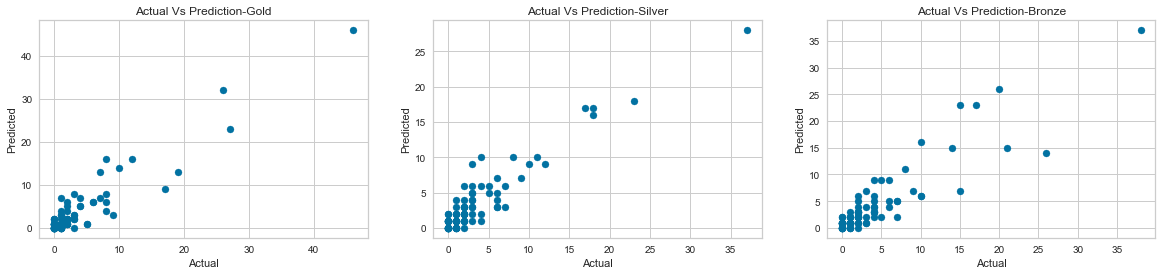

In [35]:
#Test set - Actual vs Prediction

plt.figure(figsize =(20,4))
plt.subplot(1,3,1)
plt.scatter(y_test['Gold'],y_pred_Gold)
plt.title("Actual Vs Prediction-Gold")
plt.xlabel("Actual")
plt.ylabel("Predicted")


plt.subplot(1,3,2)
plt.scatter(y_test['Silver'],y_pred_Silver)
plt.title("Actual Vs Prediction-Silver")
plt.xlabel("Actual")
plt.ylabel("Predicted")


plt.subplot(1,3,3)
plt.scatter(y_test['Bronze'],y_pred_Bronze)
plt.title("Actual Vs Prediction-Bronze")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show

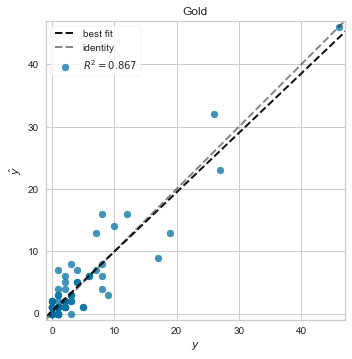

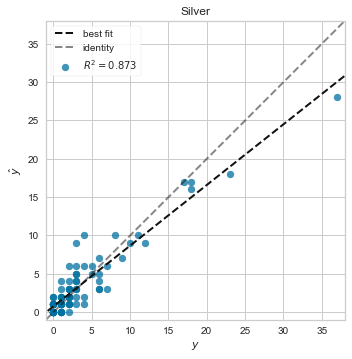

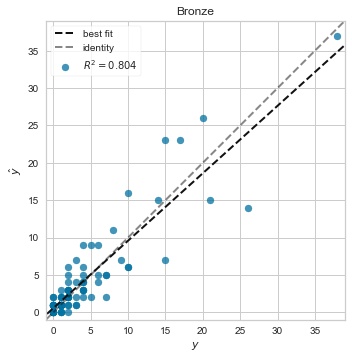

<AxesSubplot:title={'center':'Bronze'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [36]:
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(rf_gold, title = 'Gold')
visualizer.fit(X_train,y_train['Gold'])
visualizer.score(X_test,y_test['Gold'])
visualizer.poof()

visualizer = PredictionError(rf_silver, title = 'Silver')
visualizer.fit(X_train,y_train['Silver'])
visualizer.score(X_test,y_test['Silver'])
visualizer.poof()

visualizer = PredictionError(rf_bronze, title = 'Bronze')
visualizer.fit(X_train,y_train['Bronze'])
visualizer.score(X_test,y_test['Bronze'])
visualizer.poof()

In [37]:
#feature importance


feature_importance = np.array(rf_gold.feature_importances_)
feature_names = np.array(X_train.columns)
feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)
print(feat_imp_sorted)

  feature_names  feature_importance
8      Events_w            0.932332
0    Population            0.026777
1           Gdp            0.017609
6      Sports_w            0.005810
5        Sports            0.004354
3      Athletes            0.004306
2    Home_Field            0.003346
4    Athletes_w            0.003269
7        Events            0.002196


In [38]:
feature_importance = np.array(rf_silver.feature_importances_)
feature_names = np.array(X_train.columns)
feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)
print(feat_imp_sorted)

  feature_names  feature_importance
8      Events_w            0.939476
0    Population            0.013488
3      Athletes            0.012170
1           Gdp            0.009788
4    Athletes_w            0.006802
7        Events            0.006363
5        Sports            0.006330
6      Sports_w            0.004173
2    Home_Field            0.001408


In [39]:
feature_importance = np.array(rf_bronze.feature_importances_)
feature_names = np.array(X_train.columns)
feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)
print(feat_imp_sorted)

  feature_names  feature_importance
8      Events_w            0.933934
4    Athletes_w            0.016244
1           Gdp            0.013030
3      Athletes            0.010766
0    Population            0.009544
7        Events            0.009064
5        Sports            0.003119
2    Home_Field            0.002923
6      Sports_w            0.001375
